In [48]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.stats import gamma
from scipy.stats import norm
%matplotlib inline

1.Выберите ваше любимое непрерывное распределение (чем меньше оно будет похоже на нормальное, тем интереснее; попробуйте выбрать какое-нибудь распределение из тех, что мы не обсуждали в курсе)

### Выбрал гамма распределение
https://ru.wikipedia.org/wiki/Гамма-распределение

2.Сгенерируйте из него выборку объёма 1000

In [58]:
a = 1.99
b = 1
sample = gamma.rvs(a, size=1000, scale=b)


3. постройте гистограмму выборки и нарисуйте поверх неё теоретическую плотность распределения вашей случайной величины (чтобы величины были в одном масштабе, не забудьте выставить у гистограммы значение параметра normed(density)=True).

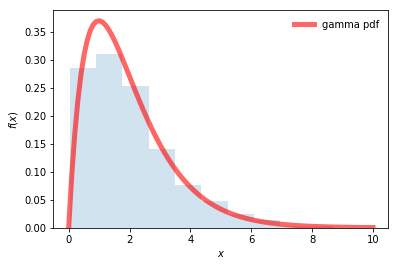

In [59]:

fig, ax = plt.subplots(1, 1)

x = np.linspace(0, 10, 100)
ax.plot(x, gamma.pdf(x, a),'r-', lw=5, alpha=0.6, label='gamma pdf')
ax.hist(sample, density=True, histtype='stepfilled', alpha=0.2)
ax.legend(loc='best', frameon=False)
plt.xlabel('$x$')
plt.ylabel('$f(x)$')

plt.show()

4.Ваша задача — оценить распределение выборочного среднего вашей случайной величины при разных объёмах выборок. Для этого при трёх и более значениях n (например, 5, 10, 50) сгенерируйте 1000 выборок объёма n и постройте гистограммы распределений их выборочных средних.

In [60]:
def getMeans(a, n):
    means = list()
    for i in range(1000):
        mean = np.mean( gamma.rvs(a, size=n, scale=b) )
        means.append(mean)
    return means    


In [61]:
means_n5 = getMeans(a, 5)
means_n10 = getMeans(a, 10)
means_n50 = getMeans(a, 50)

5.Используя информацию о среднем и дисперсии исходного распределения (её можно без труда найти в википедии), посчитайте значения параметров нормальных распределений, которыми, согласно центральной предельной теореме, приближается распределение выборочных средних. Обратите внимание: для подсчёта значений этих параметров нужно использовать именно теоретические среднее и дисперсию вашей случайной величины, а не их выборочные оценки.

In [62]:
#для гамма распределения
m = a * b
disp = a * (b**2)

norm_rv5 = norm(m, math.sqrt(disp/5))
norm_rv10 = norm(m, math.sqrt(disp/10))
norm_rv50 = norm(m, math.sqrt(disp/50))

6.Поверх каждой гистограммы нарисуйте плотность соответствующего нормального распределения (будьте внимательны с параметрами функции, она принимает на вход не дисперсию, а стандартное отклонение).

<function matplotlib.pyplot.show>

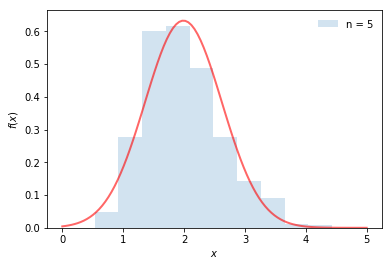

In [63]:
x = np.linspace(0, 5, 100)

plt.plot(x, norm_rv5.pdf(x),'r-', lw=2, alpha=0.6)
plt.hist(means_n5, density=True, histtype='stepfilled', alpha=0.2, label='n = 5')
plt.legend(loc='best', frameon=False)
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.show

<function matplotlib.pyplot.show>

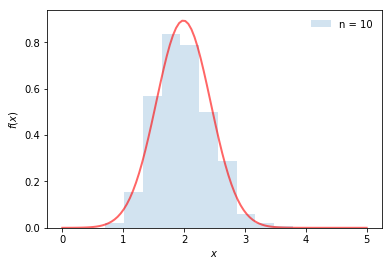

In [64]:
plt.plot(x, norm_rv10.pdf(x),'r-', lw=2, alpha=0.6)
plt.hist(means_n10, density=True, histtype='stepfilled', alpha=0.2, label='n = 10')
plt.legend(loc='best', frameon=False)
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.show

<function matplotlib.pyplot.show>

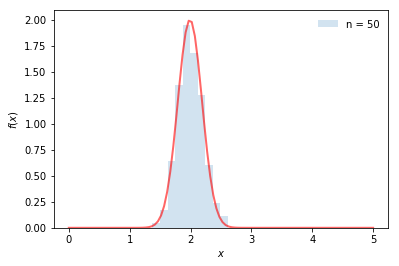

In [65]:
plt.plot(x, norm_rv50.pdf(x),'r-', lw=2, alpha=0.6)
plt.hist(means_n50, density=True, histtype='stepfilled', alpha=0.2, label='n = 50')
plt.legend(loc='best', frameon=False)
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.show

7.Опишите разницу между полученными распределениями при различных значениях n. Как меняется точность аппроксимации распределения выборочных средних нормальным с ростом n?

### Выводы
При увеличении обьема выборочного среднего (n), значения все больше концентрируются вокруг среднего значения, а так же увеличивается точность апроксимации нормальным распределением